In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("IMDB-Movie-Data.csv")
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [ ]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [ ]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
import string
import re
import nltk

In [ ]:
from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4',quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18


In [ ]:
df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [ ]:
df["Title"].describe()

count         1000
unique         999
top       The Host
freq             2
Name: Title, dtype: object

In [ ]:
df["Title"].value_counts()

Title
The Host                   2
Guardians of the Galaxy    1
The Hurt Locker            1
The Daughter               1
Pineapple Express          1
                          ..
The Fault in Our Stars     1
Blended                    1
Fast & Furious             1
Looper                     1
Nine Lives                 1
Name: count, Length: 999, dtype: int64

In [ ]:
length=len(df["Title"][0])
print("the length of the sample title is",length,"and the text is",df["Title"][0])

the length of the sample title is 23 and the text is Guardians of the Galaxy


In [ ]:
df["Length_Of_Title"]=df["Title"].str.len()

In [ ]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Length_Of_Title
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,23
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,10
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,5
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,4
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,13


In [ ]:
word_count=df["Title"][0].split()
print("no of words in the title",len(word_count),"---",df["Title"][0])

no of words in the title 4 --- Guardians of the Galaxy


In [ ]:
def word_count(title):
    title_list=title.split()
    return len(title_list)

In [ ]:
df["Word_Count_Of_Title"]=df["Title"].apply(word_count)
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Length_Of_Title,Word_Count_Of_Title
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,23,4
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,10,1
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,5,1
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,4,1
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,13,2


In [ ]:
df["Mean_Word_Length_Of_Title"]=df["Title"].map(lambda rev:np.mean([len(word) for word in rev.split()]))

In [ ]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Length_Of_Title,Word_Count_Of_Title,Mean_Word_Length_Of_Title
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,23,4,5.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,10,1,10.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,5,1,5.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,4,1,4.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,13,2,6.0


In [ ]:
df.Title.describe()

count         1000
unique         999
top       The Host
freq             2
Name: Title, dtype: object

In [ ]:
top_N=20
word_dist=nltk.FreqDist(df["Title"])
print("Äll Frquencies")
print("="*60)
result=pd.DataFrame(word_dist.most_common(top_N),columns=["Words","Frequency"])
print(result)

Äll Frquencies
                                      Words  Frequency
0                                  The Host          2
1                   Guardians of the Galaxy          1
2                                Prometheus          1
3                                     Split          1
4                                      Sing          1
5                             Suicide Squad          1
6                            The Great Wall          1
7                                La La Land          1
8                                  Mindhorn          1
9                        The Lost City of Z          1
10                               Passengers          1
11  Fantastic Beasts and Where to Find Them          1
12                           Hidden Figures          1
13                                Rogue One          1
14                                    Moana          1
15                                 Colossal          1
16                  The Secret Life of Pets       

In [ ]:
def word_list(title):
    title_list=title.split()
    return title_list
df["Word_List_Of_Title"]=df["Title"].apply(word_list)
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Length_Of_Title,Word_Count_Of_Title,Mean_Word_Length_Of_Title,Word_List_Of_Title
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,23,4,5.0,"[Guardians, of, the, Galaxy]"
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,10,1,10.0,[Prometheus]
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,5,1,5.0,[Split]
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,4,1,4.0,[Sing]
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,13,2,6.0,"[Suicide, Squad]"


In [ ]:
top_N = 10
a = df['Title'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

  Word  Frequency
0  The        226
1   of         92
2    :         85
3  the         79
4   's         29
5  and         22
6    2         22
7    A         17
8   in         15
9  Man         12


In [ ]:
df.drop(["Word_List_Of_Title"],axis=1,inplace=True)

<Axes: xlabel='Word', ylabel='Frequency'>

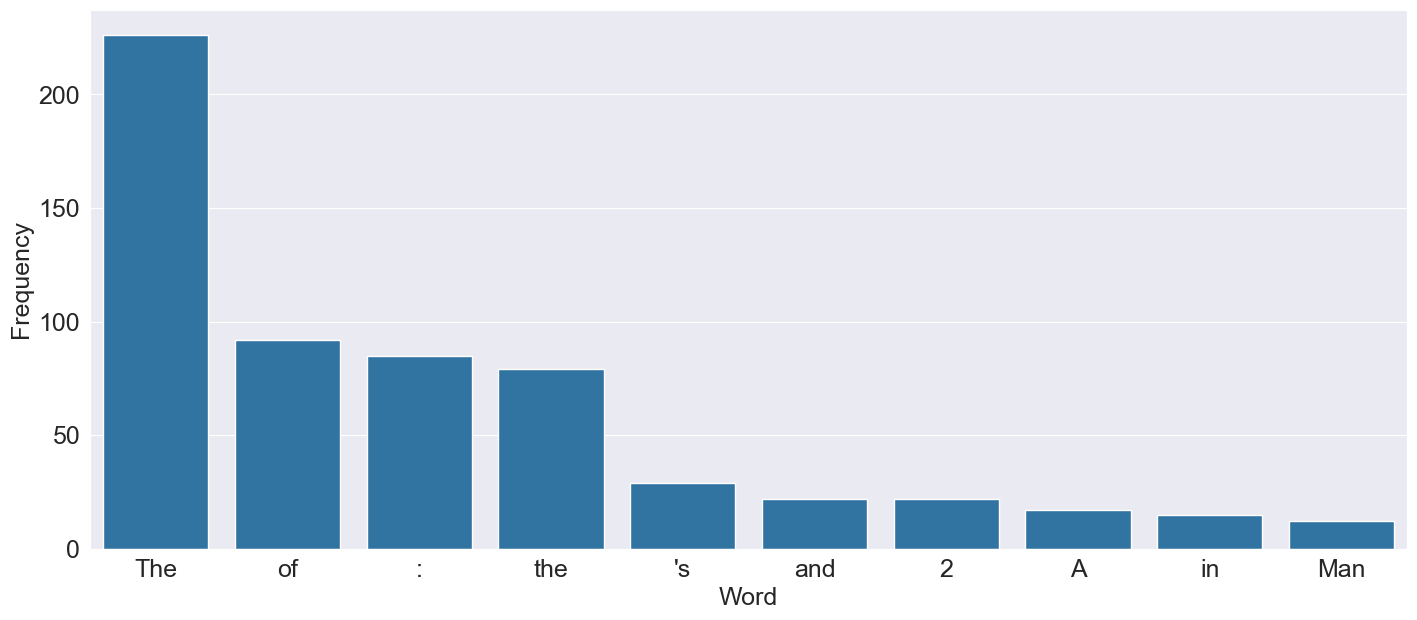

In [ ]:
sns.barplot(x=rslt["Word"],y=rslt["Frequency"])

<Axes: ylabel='Frequency'>

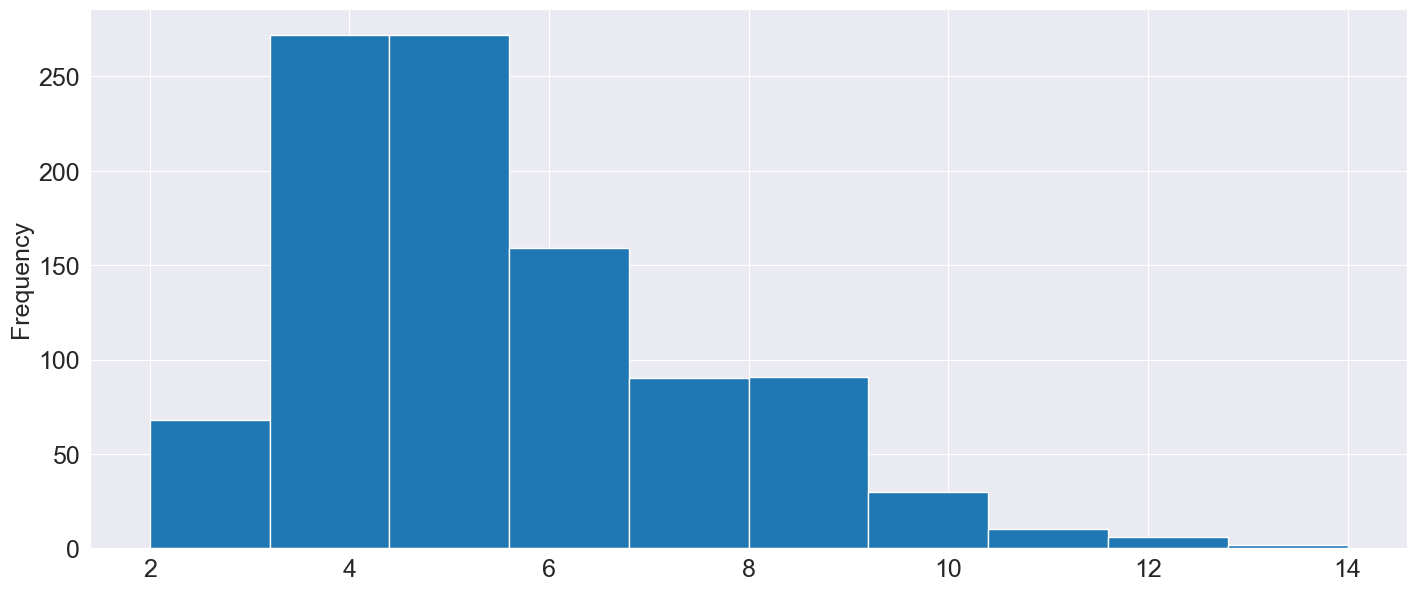

In [ ]:
df["Mean_Word_Length_Of_Title"].plot(kind="hist")

In [ ]:
top_N = 10
a = df['Genre'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

        Word  Frequency
0          ,       1555
1      Drama        513
2     Action        303
3     Comedy        279
4  Adventure        259
5   Thriller        195
6      Crime        150
7    Romance        141
8     Sci-Fi        120
9     Horror        119


In [ ]:
rslt1=rslt.iloc[1:]
rslt1

,Word,Frequency
1,Drama,513
2,Action,303
3,Comedy,279
4,Adventure,259
5,Thriller,195
6,Crime,150
7,Romance,141
8,Sci-Fi,120
9,Horror,119


<Axes: xlabel='Word', ylabel='Frequency'>

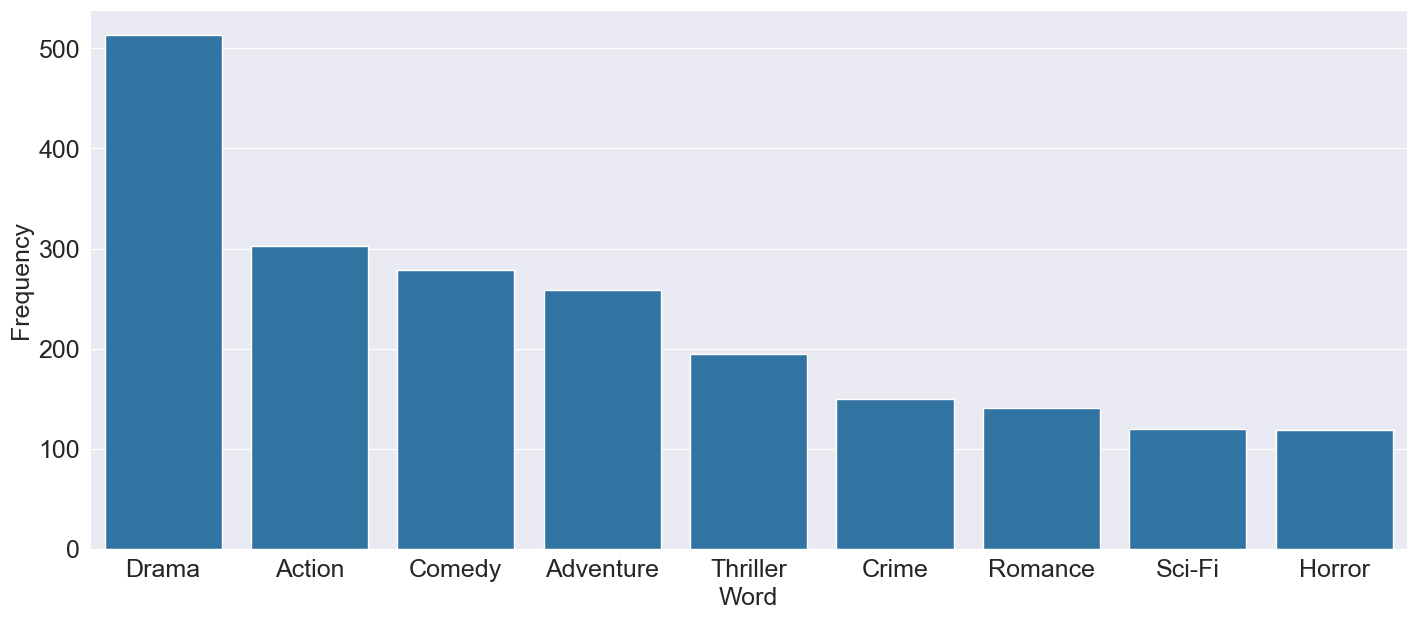

In [ ]:
sns.barplot(x=rslt1["Word"],y=rslt1["Frequency"])

In [ ]:
top_N = 20
a = df['Description'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
rslt2 = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt2)

     Word  Frequency
0       a       1285
1     the       1241
2       ,       1212
3       .       1185
4      to        934
5      of        807
6     and        716
7      in        500
8     his        481
9       A        343
10     is        299
11   with        263
12     an        259
13    her        252
14     's        242
15     on        222
16  their        217
17    for        199
18    who        190
19     he        186


In [ ]:
df["Description"].isna().sum()

0

In [ ]:
df["Description"].isnull().sum()

0

In [ ]:
df["Actors"]

0      Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...
1      Noomi Rapace, Logan Marshall-Green, Michael Fa...
2      James McAvoy, Anya Taylor-Joy, Haley Lu Richar...
3      Matthew McConaughey,Reese Witherspoon, Seth Ma...
4      Will Smith, Jared Leto, Margot Robbie, Viola D...
                             ...                        
995    Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...
996    Lauren German, Heather Matarazzo, Bijou Philli...
997    Robert Hoffman, Briana Evigan, Cassie Ventura,...
998    Adam Pally, T.J. Miller, Thomas Middleditch,Sh...
999    Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...
Name: Actors, Length: 1000, dtype: object

In [ ]:
top_N = 20
a = df['Actors'].str.cat(sep=',')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
rslt3 = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt3)

        Word  Frequency
0          ,       3998
1    Michael         73
2      James         54
3        Tom         48
4      Jason         46
5      Chris         43
6       John         42
7     Robert         40
8   Jennifer         38
9       Mark         36
10       Ben         34
11    Daniel         30
12      Josh         30
13      Emma         28
14      Kate         28
15    Wilson         28
16      Paul         27
17      Will         25
18      Ryan         25
19     Kevin         25
